# Assignment 2

#### We decided to select the Individual household electric power consumption Data Set.

This dataset contains 2075259 samples which are measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months). The number of attributes is 9.

The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.


#### Each Attribute's Information:

1.date: Date in format dd/mm/yyyy 

2.time: time in format hh:mm:ss 

3.global_active_power: household global minute-averaged active power (in kilowatt) 

4.global_reactive_power: household global minute-averaged reactive power (in kilowatt) 

5.voltage: minute-averaged voltage (in volt) 

6.global_intensity: household global minute-averaged current intensity (in ampere)

7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered). 

8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light. 

9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.


### Preprocessing the data:

We would like to preproccess the data a bit before starting using it:

- We had 2 different attributes for date and time, and we decided to combine them into a single attribute, so it will be more convenient to distinguish between different time entries. Therefore, we now have a total of 8 attributes.

- We also added an additional column named ‘Energy consumption’, which represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3. This is how it’s calculated:
(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) 


- Additionally, there were some missing values which we replaced with 0.


#### Importing the required modules and reading the data from the csv file:

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import pandas as pd
import numpy as np
import datetime
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
 
data = pd.read_csv('../household_power_consumption.txt', sep=";",parse_dates=[['Date', 'Time']], header=0, dtype={"Global_active_power": float, 
                                                                                'Global_reactive_power': float,
                                                                               'Voltage': float, 'Global_intensity': float,
                                                                               'Sub_metering_1': float, 'Sub_metering_2': float, 'Sub_metering_3':float},
                                                                                index_col='Date_Time')


data.dropna(inplace=True)


Using TensorFlow backend.


#### Computing the energy consumption values and adding a corresponding column:

In [3]:
def computeEnergyConsumption(global_active_power, sub_metering_1,sub_metering_2,sub_metering_3):
    return (global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) 
    
data['Energy_Consumption'] = data.apply(lambda x: computeEnergyConsumption(x['Global_active_power'], x['Sub_metering_1'],x['Sub_metering_2'],x['Sub_metering_3']), axis=1)
data[:20]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Energy_Consumption
Date_Time,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000
2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0,39.666667
2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0,43.700000
2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0,43.666667
2006-12-16 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0,43.133333


#### The task we have at hand is regression. 
It's the problem of predicting a continuous quantity output. We will try to predict the future values of the energy consumption. 

#### Let's show some graphs to get a better indication of the values: 

In [4]:
def plotGraphs(col):
    plt.figure()
    plt.plot(data.index, data[col])

    plt.title(col)
    plt.gcf().autofmt_xdate() # Rotation
    plt.show()

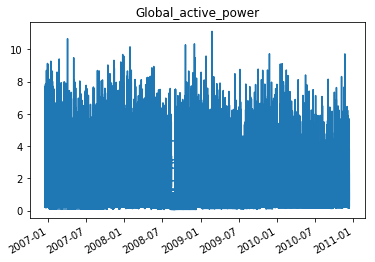

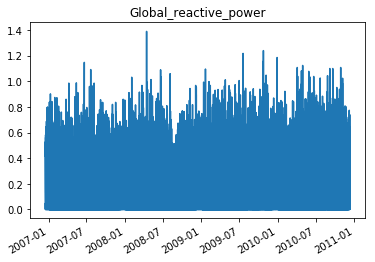

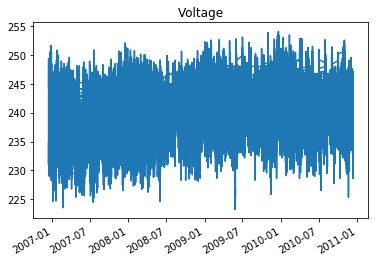

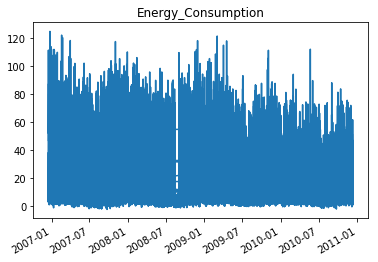

In [5]:
plotGraphs('Global_active_power')
plotGraphs('Global_reactive_power')
plotGraphs('Voltage')
plotGraphs('Energy_Consumption')


We can see from the graphs that the data is balanced over time. There are some minimum spikes during certain periods of time. Below we can see some metrics describing the scatter of all the values.

In [6]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Energy_Consumption
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,9.314693e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,9.585916e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.800000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.500000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.036667e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.248333e+02


#### Energy Consumption per Hour

Lets look at the average and sum of the energy consumption per hour. we can see that the samples vary in the same manner but its more noticable that the values over time are changing more drasticly. We might resample the data to average values of every hour instead of minutes to see how it affects the fitting later.

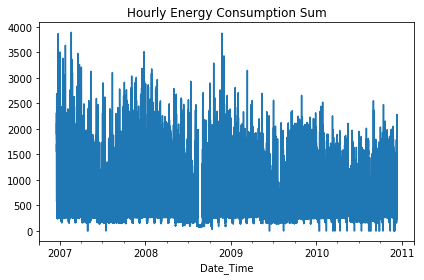

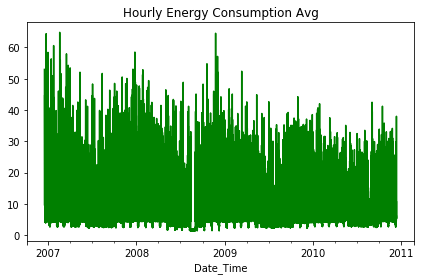

In [7]:
data.Energy_Consumption.resample('H').sum().plot(title='Hourly Energy Consumption Sum') 
#df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day', color='red') 
plt.tight_layout()
plt.show()   

data.Energy_Consumption.resample('H').mean().plot(title='Hourly Energy Consumption Avg', color='green') 
plt.tight_layout()
plt.show()

#### Energy Comsumption correlation with other values:

Lets see some correlation between different attributes values and the energy consumption. We will see how those variables impact the value of the energy consumption. There are too many minute samples so lets address the hourly average of the correlation between the values.

H:\Anaconda\envs\Deep Learning\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


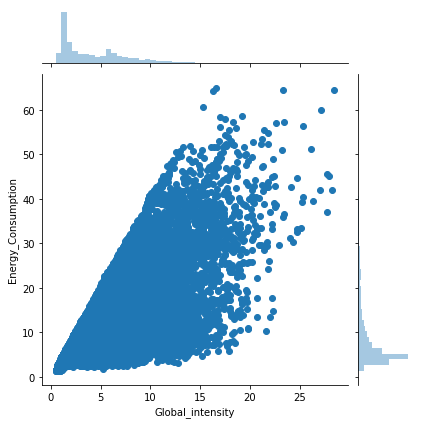

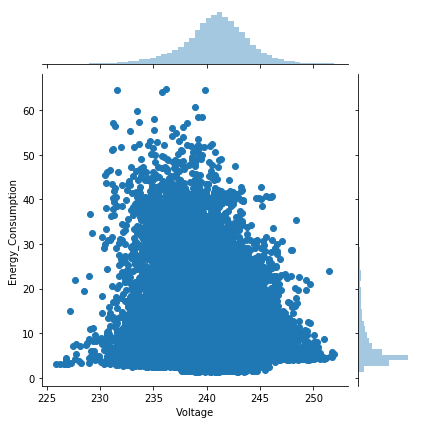

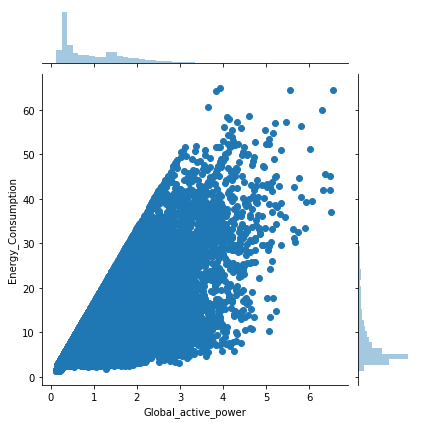

In [8]:
#data_returns = data.pct_change()
sns.jointplot(x=data.Global_intensity.resample('H').mean(), y=data.Energy_Consumption.resample('H').mean(), data=data)  
plt.show()

sns.jointplot(x=data.Voltage.resample('H').mean(), y=data.Energy_Consumption.resample('H').mean(), data=data)  
plt.show()

sns.jointplot(x=data.Global_active_power.resample('H').mean(), y=data.Energy_Consumption.resample('H').mean(), data=data)  
plt.show()

### Normalizing the data:

In order to get better results we will normalize the data for each attribute by computing the mean and std.

In [9]:
def normalize(col):
    mean = np.mean(data[col])
    std = np.std(data[col])
    data[col] = (data[col]-mean)/std

In [10]:
energyMean = np.mean(data['Energy_Consumption'])
energyStd = np.std(data['Energy_Consumption'])
normalize('Global_active_power')
normalize('Global_reactive_power')
normalize('Voltage')
normalize('Global_intensity')
normalize('Sub_metering_1')
normalize('Sub_metering_2')
normalize('Sub_metering_3')
normalize('Energy_Consumption')

data[:20]


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Energy_Consumption
Date_Time,,,,,,,,
2006-12-16 17:24:00,2.955077,2.610721,-1.851816,3.098789,-0.182337,-0.051274,1.249421,4.480739
2006-12-16 17:25:00,4.037085,2.770406,-2.225274,4.133800,-0.182337,-0.051274,1.130897,6.574088
2006-12-16 17:26:00,4.050326,3.320432,-2.330213,4.133800,-0.182337,0.120487,1.249421,6.389790
2006-12-16 17:27:00,4.063567,3.355917,-2.191324,4.133800,-0.182337,-0.051274,1.249421,6.518451
2006-12-16 17:28:00,2.434881,3.586573,-1.592556,2.513782,-0.182337,-0.051274,1.249421,3.524474
2006-12-16 17:29:00,2.296793,3.533345,-1.796260,2.333780,-0.182337,0.120487,1.249421,3.166310
2006-12-16 17:30:00,2.468930,3.515602,-1.774655,2.513782,-0.182337,-0.051274,1.249421,3.587066
2006-12-16 17:31:00,2.467039,3.515602,-1.734532,2.513782,-0.182337,-0.051274,1.249421,3.583589
2006-12-16 17:32:00,2.436773,3.426888,-2.114163,2.513782,-0.182337,-0.051274,1.249421,3.527952


We will use LSTM in order to predict the current energy consumption based on the attributes from the previous time frame, for now we will look one minute back. Also we will drop the unwanted columns from the data to make sure that the model fits only on the attributes that belong to past samples.

In [11]:
def Preprocess(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [12]:
processedData = Preprocess(data, 1, 1)
processedData.drop(processedData.columns[[7,8,9,10,11,12,13,14]], axis=1, inplace=True)

In [13]:
processedData[:20]

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t)
Date_Time,,,,,,,,
2006-12-16 17:25:00,2.955077,2.610721,-1.851816,3.098789,-0.182337,-0.051274,1.249421,6.574088
2006-12-16 17:26:00,4.037085,2.770406,-2.225274,4.133800,-0.182337,-0.051274,1.130897,6.389790
2006-12-16 17:27:00,4.050326,3.320432,-2.330213,4.133800,-0.182337,0.120487,1.249421,6.518451
2006-12-16 17:28:00,4.063567,3.355917,-2.191324,4.133800,-0.182337,-0.051274,1.249421,3.524474
2006-12-16 17:29:00,2.434881,3.586573,-1.592556,2.513782,-0.182337,-0.051274,1.249421,3.166310
2006-12-16 17:30:00,2.296793,3.533345,-1.796260,2.333780,-0.182337,0.120487,1.249421,3.587066
2006-12-16 17:31:00,2.468930,3.515602,-1.774655,2.513782,-0.182337,-0.051274,1.249421,3.583589
2006-12-16 17:32:00,2.467039,3.515602,-1.734532,2.513782,-0.182337,-0.051274,1.249421,3.527952
2006-12-16 17:33:00,2.436773,3.426888,-2.114163,2.513782,-0.182337,-0.051274,1.249421,3.517520


## Part 2: Forming a neural network graph

#### Validation strategy:

We decided to split the data into train and test sets; out of 47 months of samples (sample for each minute), we took 2.5 years for training, and leave rest (1.5 years) for test. 



In [28]:
# 913 hours is 2 and half years - goes to train, and the rest goes for testing 
# split into train and test sets
values = processedData.values
n_train_hours = 913 * 24 * 60
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1314720, 1, 7) (1314720,) (734559, 1, 7) (734559,)


We now have 1314720 samples for training and 734559 samples for testing. 

## Creating a baseline solution and calculating train and validation score accordingly:

We are predicting the energy consumption value, which is dependent on other attributes’ values. The formula to calculate it is:

(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) 

The model will try to look at the values of past values (one minute ago).


## Training and fitting the model:



We are fitting the model, starting to training it for 15 epochs with a batch size of 40.

In [15]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=15, batch_size=40, validation_data=(test_X, test_y), verbose=2, shuffle=False)


Train on 1314720 samples, validate on 734559 samples
Epoch 1/15
 - 219s - loss: 0.1401 - val_loss: 0.1174
Epoch 2/15
 - 213s - loss: 0.1235 - val_loss: 0.1147
Epoch 3/15
 - 209s - loss: 0.1195 - val_loss: 0.1104
Epoch 4/15
 - 208s - loss: 0.1167 - val_loss: 0.1085
Epoch 5/15
 - 214s - loss: 0.1152 - val_loss: 0.1057
Epoch 6/15
 - 210s - loss: 0.1145 - val_loss: 0.1047
Epoch 7/15
 - 212s - loss: 0.1140 - val_loss: 0.1052
Epoch 8/15
 - 212s - loss: 0.1134 - val_loss: 0.1044
Epoch 9/15
 - 214s - loss: 0.1131 - val_loss: 0.1046
Epoch 10/15
 - 212s - loss: 0.1127 - val_loss: 0.1047
Epoch 11/15
 - 212s - loss: 0.1126 - val_loss: 0.1052
Epoch 12/15
 - 229s - loss: 0.1123 - val_loss: 0.1054
Epoch 13/15
 - 209s - loss: 0.1122 - val_loss: 0.1039
Epoch 14/15
 - 225s - loss: 0.1120 - val_loss: 0.1056
Epoch 15/15
 - 222s - loss: 0.1119 - val_loss: 0.1052


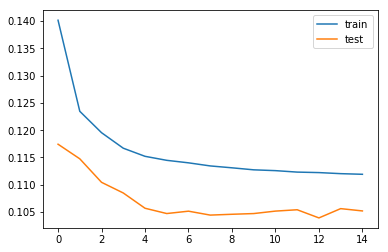

In [16]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


## Results: 



#### Let's predict the results on the test set:

###############  A FEW WORDS ABOUT THE RESULTS

In [17]:
preds = model.predict(test_X)

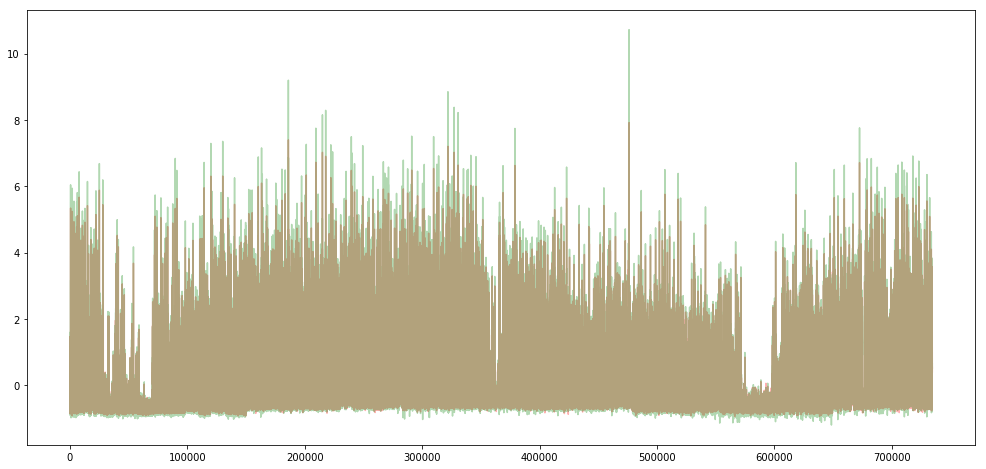

In [18]:
def revertNormalization(val):
    return val*energyStd + energyMean

predsDF = pd.DataFrame(data = preds)
predsDF.apply(lambda x: revertNormalization(x), axis=1)
testDF = pd.DataFrame(data = test_y)
testDF.apply(lambda x: revertNormalization(x), axis=1)

plt.figure(figsize=(17,8))
plt.plot(predsDF,c='red',alpha=0.3)
plt.plot(testDF,c='green',alpha=0.3)


## Improving the model with a dropout layer

We add a dropout layer with a drop 20%

In [19]:
from keras.layers import Dropout

# design network
model2 = Sequential()
model2.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model2.add(Dropout(0.2))
model2.add(Dense(1))
model2.compile(loss='mae', optimizer='adam')
# fit network
history = model2.fit(train_X, train_y, epochs=15, batch_size=40, validation_data=(test_X, test_y), verbose=2, shuffle=False)


Train on 1314720 samples, validate on 734559 samples
Epoch 1/15
 - 219s - loss: 0.1404 - val_loss: 0.1242
Epoch 2/15
 - 221s - loss: 0.1241 - val_loss: 0.1155
Epoch 3/15
 - 211s - loss: 0.1190 - val_loss: 0.1076
Epoch 4/15
 - 215s - loss: 0.1163 - val_loss: 0.1088
Epoch 5/15
 - 204s - loss: 0.1150 - val_loss: 0.1065
Epoch 6/15
 - 206s - loss: 0.1143 - val_loss: 0.1072
Epoch 7/15
 - 205s - loss: 0.1136 - val_loss: 0.1063
Epoch 8/15
 - 205s - loss: 0.1131 - val_loss: 0.1060
Epoch 9/15
 - 204s - loss: 0.1128 - val_loss: 0.1053
Epoch 10/15
 - 207s - loss: 0.1126 - val_loss: 0.1049
Epoch 11/15
 - 228s - loss: 0.1124 - val_loss: 0.1046
Epoch 12/15
 - 227s - loss: 0.1122 - val_loss: 0.1038
Epoch 13/15
 - 228s - loss: 0.1121 - val_loss: 0.1049
Epoch 14/15
 - 229s - loss: 0.1119 - val_loss: 0.1042
Epoch 15/15
 - 213s - loss: 0.1118 - val_loss: 0.1041


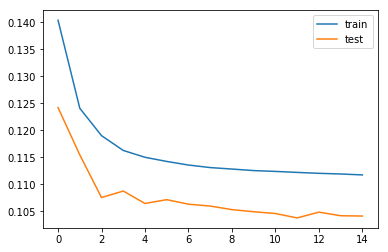

In [20]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


In [21]:
preds = model2.predict(test_X)

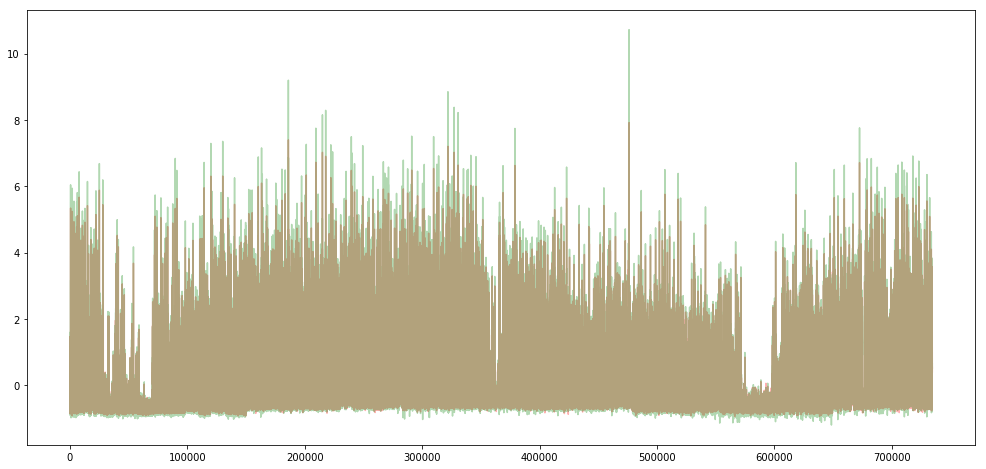

In [22]:
predsDF = pd.DataFrame(data = preds)
predsDF.apply(lambda x: revertNormalization(x), axis=1)
testDF = pd.DataFrame(data = test_y)
testDF.apply(lambda x: revertNormalization(x), axis=1)

plt.figure(figsize=(17,8))
plt.plot(predsDF,c='red',alpha=0.3)
plt.plot(testDF,c='green',alpha=0.3)


## Improving the model by resampling the data from minutes to hours

We resample the data by averaging the values for every minute to an hourly average value.

In [25]:
data_resample = data.resample('h').mean() 
processedHourlyData = Preprocess(data_resample, 1, 1)
processedHourlyData.drop(processedHourlyData.columns[[7,8,9,10,11,12,13,14]], axis=1, inplace=True)
processedHourlyData[:20]

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t)
Date_Time,,,,,,,,
2006-12-16 18:00:00,2.961593,0.934029,-1.912344,3.031288,-0.182337,-0.132384,1.232959,2.883256
2006-12-16 19:00:00,2.402913,-0.387512,-1.932012,2.468782,-0.182337,0.930629,1.233618,3.050225
2006-12-16 20:00:00,2.183516,-0.341381,-2.347960,2.222029,-0.182337,0.023156,1.211888,2.960394
2006-12-16 21:00:00,2.058984,-0.431278,-2.089008,2.090027,-0.182337,-0.223036,1.223741,2.502952
2006-12-16 22:00:00,1.858378,-0.417379,-1.136175,1.894275,-0.182337,-0.151468,1.275101,2.377189
2006-12-16 23:00:00,1.048449,-0.599243,-0.641934,1.101516,-0.182337,-0.200134,-0.240023,2.604027
2006-12-17 00:00:00,0.917422,-0.463806,-0.067961,0.960515,-0.182337,-0.208722,-0.765477,2.252585
2006-12-17 01:00:00,0.747996,-0.188793,0.037647,0.787263,-0.182337,-0.142880,-0.765477,2.219435
2006-12-17 02:00:00,2.135437,0.117270,-0.120841,2.164278,-0.182337,4.111080,-0.765477,1.728900


In [27]:
# 913 hours is 2 and half years - goes to train, and the rest goes for testing 
# split into train and test sets
values = processedHourlyData.values
n_train_hours = 913 * 24 * 60
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X2, train_y2 = train[:, :-1], train[:, -1]
test_X2, test_y2 = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X2 = train_X2.reshape((train_X2.shape[0], 1, train_X2.shape[1]))
test_X2 = test_X2.reshape((test_X2.shape[0], 1, test_X2.shape[1]))
print(train_X2.shape, train_y2.shape, test_X2.shape, test_y2.shape)

(34147, 1, 7) (34147,) (0, 1, 7) (0,)


In [ ]:

# design network
model3 = Sequential()
model3.add(LSTM(50, input_shape=(train_X2.shape[1], train_X2.shape[2])))
model3.add(Dropout(0.2))
model3.add(Dense(1))
model3.compile(loss='mae', optimizer='adam')
# fit network
history = model3.fit(train_X2, train_y2, epochs=15, batch_size=40, validation_data=(test_X2, test_y2), verbose=2, shuffle=False)


In [ ]:
preds = model3.predict(test_X2)

In [ ]:
predsDF = pd.DataFrame(data = preds)
predsDF.apply(lambda x: revertNormalization(x), axis=1)
testDF = pd.DataFrame(data = test_y2)
testDF.apply(lambda x: revertNormalization(x), axis=1)

plt.figure(figsize=(17,8))
plt.plot(predsDF,c='red',alpha=0.3)
plt.plot(testDF,c='green',alpha=0.3)

## Fitting a classical machine learning model to the data to get a better benchmark:

In [58]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(train_X,train_y)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [ ]:
mlpreds = lm.predict(test_X)

In [ ]:
plt.scatter(test_y,mlpreds)